# Implementacja operacji konwolucji w pythonie

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
from numba import cuda
from scipy.ndimage.filters import convolve
import cv2

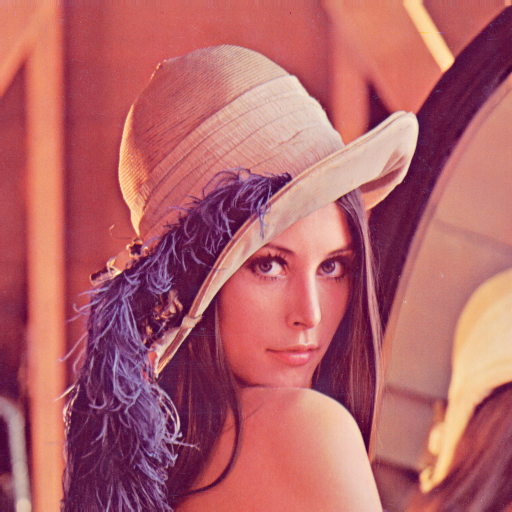

In [4]:
img_pil = Image.open('../obrazy_testowe/lena_512x512.png')
img_pil

In [5]:
img_np = np.array(img_pil)/255

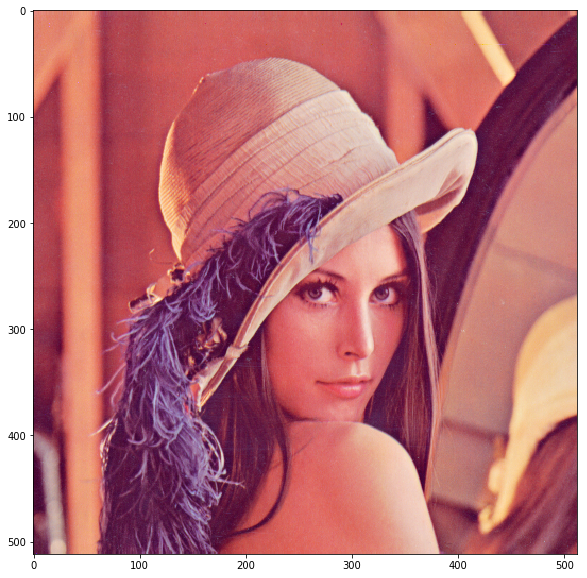

(512, 512, 3)

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img_np)
plt.show()
img_np.shape

## Filtr średniej 3x3

In [6]:
mean_3_3 = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1],],
               dtype='float')/9

* wbudowana w scipy

In [15]:
%%timeit
img_mean = np.stack([convolve(np.squeeze(img_np[...,i]),mean_3_3) for i in range(3)],axis=-1)

11.7 ms ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


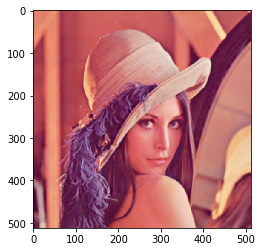

In [18]:
img_mean = np.stack([convolve(np.squeeze(img_np[...,i]),mean_3_3) for i in range(3)],axis=-1)
plt.imshow(img_mean)
plt.show()

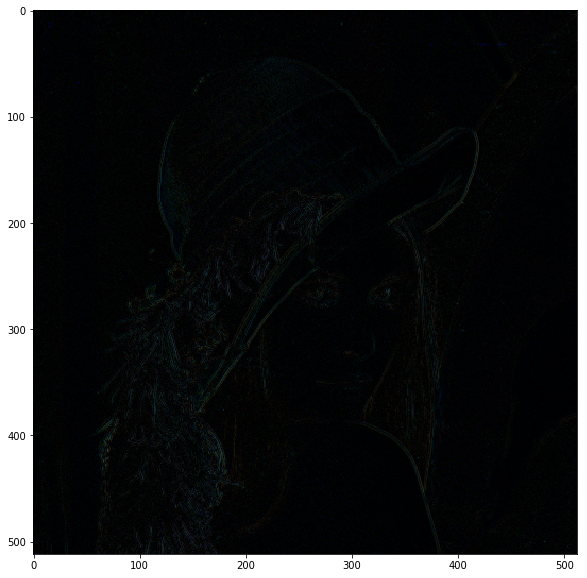

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(img_mean-img_np))
plt.show()

* opencv

In [17]:
%timeit cv2.filter2D(img_np,-1,mean_3_3)

4.24 ms ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* w pętlach

In [20]:
%%timeit
img_mean_fl = img_np.copy()
for i in range(1,img_mean_fl.shape[0]-1):
    for j in range(1,img_mean_fl.shape[1]-1):
        for k in range(3):
            val = 0
            for m in range(-1,2):
                for n in range(-1,2):
                    val+= img_mean_fl[i+m,j+n,k]*mean_3_3[m+1,n+1]
            img_mean_fl[i,j,k] = val

5.08 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
img_mean_fl = img_np.copy()
for i in range(1,img_mean_fl.shape[0]-1):
    for j in range(1,img_mean_fl.shape[1]-1):
        for k in range(3):
            val = 0
            for m in range(-1,2):
                for n in range(-1,2):
                    val+= img_mean_fl[i+m,j+n,k]*mean_3_3[m+1,n+1]
            img_mean_fl[i,j,k] = val

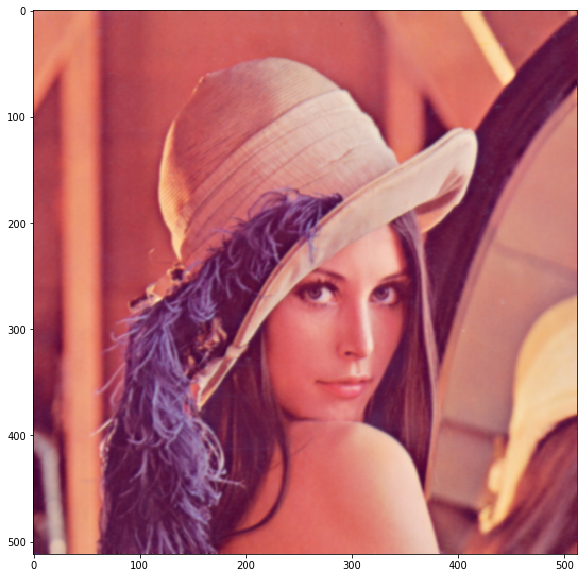

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img_mean_fl)
plt.show()

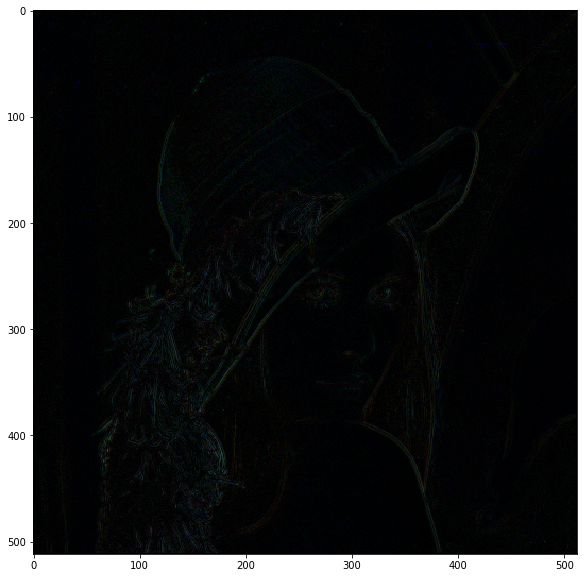

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(img_mean_fl-img_np))
plt.show()

* przyspieszenie numba

In [32]:
img_mean_fl = img_np.copy()
@nb.jit()
def wolna_funkcja_duzo_petli(img_mean_fl):
    for i in range(1,img_mean_fl.shape[0]-1):
        for j in range(1,img_mean_fl.shape[1]-1):
            for k in range(3):
                val = 0
                for m in range(-1,2):
                    for n in range(-1,2):
                        val+= img_mean_fl[i+m,j+n,k]*mean_3_3[m+1,n+1]
                img_mean_fl[i,j,k] = val
    return img_mean_fl

In [33]:
%time img_mean_fl = wolna_funkcja_duzo_petli(img_mean_fl)

Wall time: 291 ms
